# **Final Project - Sanbercode - Python for Data Science Batch 30**
By Billy Jonathan Halim <br/>
billyhalim31@gmail.com

## Objective <br/>
* Untuk mengkategorikan negara menggunakan faktor sosial ekonomi dan kesehatan yang menentukan pembangunan negara secara keseluruhan.


## Permasalahan
* HELP International telah berhasil mengumpulkan sekitar $ 10 juta. Saat ini, CEO LSM perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Jadi, CEO harus mengambil keputusan untuk memilih negara yang paling membutuhkan bantuan. 
* Oleh karena itu, Tugas teman-teman  adalah mengkategorikan negara menggunakan beberapa faktor sosial ekonomi dan kesehatan yang menentukan perkembangan negara secara keseluruhan. Kemudian kalian perlu menyarankan negara mana saja  yang paling perlu menjadi fokus CEO.


[Data_Negara_HELP](https://drive.google.com/file/d/153MCsFEWeyDovASi_WAAs1A9EGl1jp2t/view?usp=sharing)

## Import library

In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from google.colab import files
from IPython.display import Image

## Akses File Local Drive

In [ ]:
#from google.colab import files
#uploaded = files.upload()


In [ ]:
# Buat DataFrame
#df = pd.read_csv(io.BytesIO(uploaded['Data_Negara_HELP.csv'])) # Dataset is now stored in a Pandas Dataframe
#df

## Auth Google Drive

In [ ]:
# Code to read csv file into Colaboratory:!pip install -U -q PyDrive
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)


## Akses Google Drive Path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Mount File Path

In [ ]:
path = '/content/drive/My Drive/Datasets/Data_Negara_HELP.csv'
df = pd.read_csv(path)

In [ ]:
images_dir = '/content/gdrive/My Drive/Images'

## Cek dan convert Data Types, and cek data null

In [ ]:
# DataFraeme Head
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Penjelasan kolom fitur:
*	Negara : Nama negara
*	Kematian_anak: Kematian anak di bawah usia 5 tahun per 1000 kelahiran
*	Ekspor : Ekspor barang dan jasa perkapita
*	Kesehatan: Total pengeluaran kesehatan perkapita
*	Impor: Impor barang dan jasa perkapita
*	Pendapatan: Penghasilan bersih perorang
*	Inflasi: Pengukuran tingkat pertumbuhan tahunan dari Total GDP 
*	Harapan_hidup: Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama
*	Jumlah_fertiliti: Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama
*	GDPperkapita: GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi. 

In [ ]:
df.dtypes

Negara               object
Kematian_anak       float64
Ekspor              float64
Kesehatan           float64
Impor               float64
Pendapatan            int64
Inflasi             float64
Harapan_hidup       float64
Jumlah_fertiliti    float64
GDPperkapita          int64
dtype: object

In [ ]:
df['Pendapatan'] = df['Pendapatan'].astype(float)
df[ 'GDPperkapita'] = df['GDPperkapita'].astype(float)
df.dtypes

Negara               object
Kematian_anak       float64
Ekspor              float64
Kesehatan           float64
Impor               float64
Pendapatan          float64
Inflasi             float64
Harapan_hidup       float64
Jumlah_fertiliti    float64
GDPperkapita        float64
dtype: object

In [ ]:
# Cek Null pada Data
df.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

In [ ]:
df.shape

(167, 10)

In [ ]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## EDA

### Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

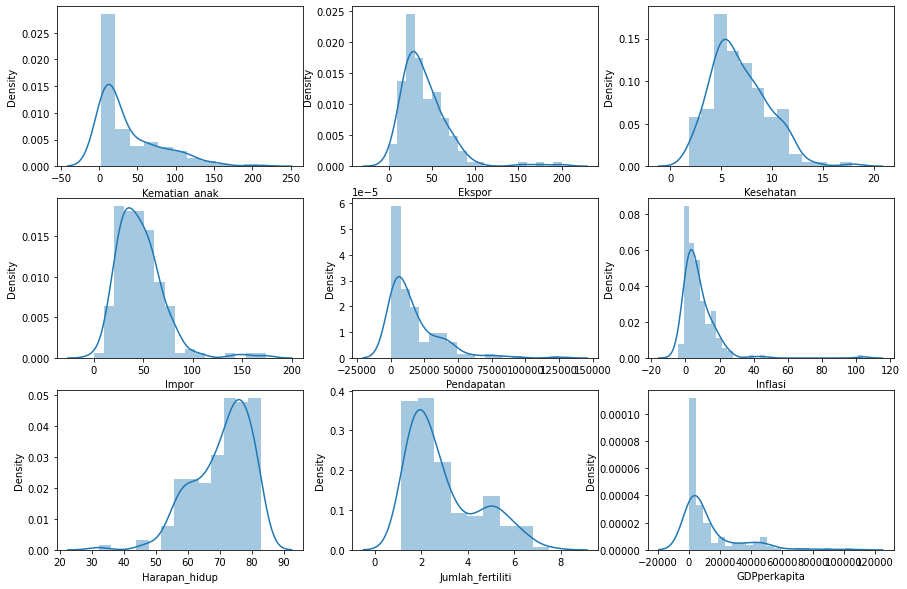

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,10))

for i in enumerate(df.describe().columns):
  plt.subplot(3,3, i[0]+1)
  sns.distplot(df[i[1]])
plt.show()
#images_dir = '/content/gdrive/My Drive/Images'
#plt.savefig(f"{images_dir}/Plot(01)_Univariate_Analysis.png")

### Bivariate Analysis

#### Terbesar

#### Pendapatan - GDPperkapita

In [ ]:
Pendapatan1 = df.sort_values('Pendapatan', ascending=False)
Pendapatan1

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
123,Qatar,9.0,62.30,1.81,23.8,125000.0,6.980,79.5,2.07,70300.0
91,Luxembourg,2.8,175.00,7.77,142.0,91700.0,3.620,81.3,1.63,105000.0
23,Brunei,10.5,67.40,2.84,28.0,80600.0,16.700,77.1,1.84,35300.0
82,Kuwait,10.8,66.70,2.63,30.4,75200.0,11.200,78.2,2.21,38500.0
133,Singapore,2.8,200.00,3.96,174.0,72100.0,-0.046,82.7,1.15,46600.0
...,...,...,...,...,...,...,...,...,...,...
31,Central African Republic,149.0,11.80,3.98,26.5,888.0,2.010,47.5,5.21,446.0
112,Niger,123.0,22.20,5.16,49.1,814.0,2.550,58.8,7.49,348.0
26,Burundi,93.6,8.92,11.60,39.2,764.0,12.300,57.7,6.26,231.0
88,Liberia,89.3,19.10,11.80,92.6,700.0,5.470,60.8,5.02,327.0


In [ ]:
Pendapatan1 = df.sort_values('Pendapatan', ascending=False)
Pendapatan1

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
123,Qatar,9.0,62.30,1.81,23.8,125000.0,6.980,79.5,2.07,70300.0
91,Luxembourg,2.8,175.00,7.77,142.0,91700.0,3.620,81.3,1.63,105000.0
23,Brunei,10.5,67.40,2.84,28.0,80600.0,16.700,77.1,1.84,35300.0
82,Kuwait,10.8,66.70,2.63,30.4,75200.0,11.200,78.2,2.21,38500.0
133,Singapore,2.8,200.00,3.96,174.0,72100.0,-0.046,82.7,1.15,46600.0
...,...,...,...,...,...,...,...,...,...,...
31,Central African Republic,149.0,11.80,3.98,26.5,888.0,2.010,47.5,5.21,446.0
112,Niger,123.0,22.20,5.16,49.1,814.0,2.550,58.8,7.49,348.0
26,Burundi,93.6,8.92,11.60,39.2,764.0,12.300,57.7,6.26,231.0
88,Liberia,89.3,19.10,11.80,92.6,700.0,5.470,60.8,5.02,327.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


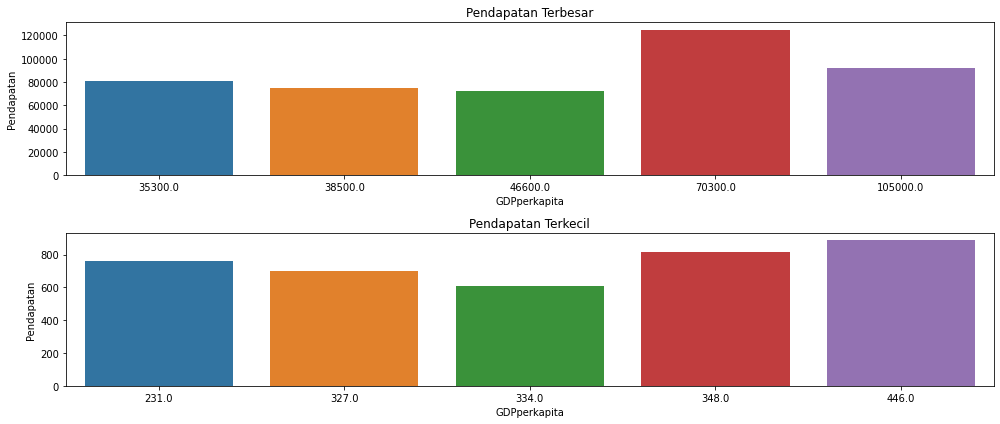

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.barplot(Pendapatan1.GDPperkapita.head(), Pendapatan1.Pendapatan.head())
plt.title('Pendapatan Terbesar')
plt.subplot(2,1,2)
sns.barplot(Pendapatan1.GDPperkapita.tail(), Pendapatan1.Pendapatan.tail())
plt.title('Pendapatan Terkecil')
plt.tight_layout()
plt.show()
# plt.savefig(f"{images_dir}/Plot(02)Bivariate(01)_Pendapatan-GDPPerkapita.png")
#plt.savefig("Plot(02)Bivariate(01)_Pendapatan-GDPPerkapita.jpg")
#files.download("Plot(02)Bivariate(01)_Pendapatan-GDPPerkapita.jpg") 

#### Kematian Anak - Jumlah Fertiliti

In [ ]:
Kematian_Anak = df.sort_values('Kematian_anak', ascending=False)
Kematian_Anak

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
66,Haiti,208.0,15.3,6.91,64.7,1500.0,5.450,32.1,3.33,662.0
132,Sierra Leone,160.0,16.8,13.10,34.5,1220.0,17.200,55.0,5.20,399.0
32,Chad,150.0,36.8,4.53,43.5,1930.0,6.390,56.5,6.59,897.0
31,Central African Republic,149.0,11.8,3.98,26.5,888.0,2.010,47.5,5.21,446.0
97,Mali,137.0,22.8,4.98,35.1,1870.0,4.370,59.5,6.55,708.0
...,...,...,...,...,...,...,...,...,...,...
53,Finland,3.0,38.7,8.95,37.4,39800.0,0.351,80.0,1.87,46200.0
144,Sweden,3.0,46.2,9.63,40.7,42900.0,0.991,81.5,1.98,52100.0
133,Singapore,2.8,200.0,3.96,174.0,72100.0,-0.046,82.7,1.15,46600.0
91,Luxembourg,2.8,175.0,7.77,142.0,91700.0,3.620,81.3,1.63,105000.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


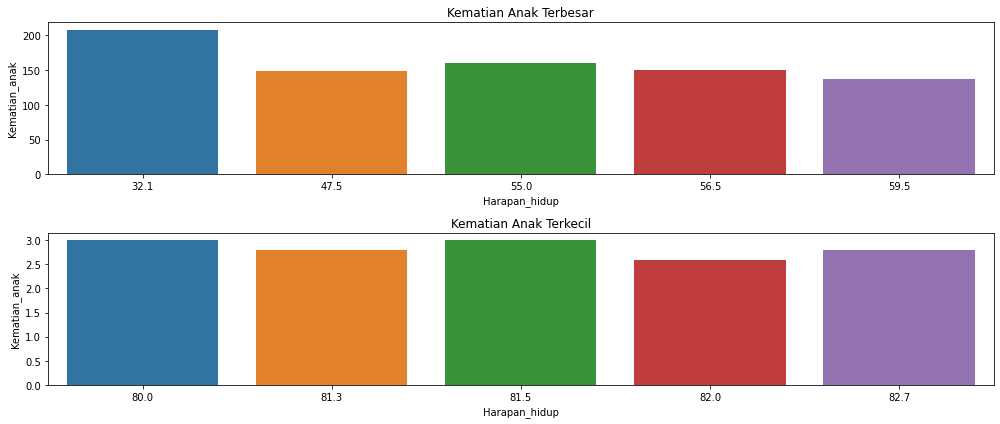

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.barplot(Kematian_Anak.Harapan_hidup.head(), Kematian_Anak.Kematian_anak.head())
plt.title('Kematian Anak Terbesar')
plt.subplot(2,1,2)
sns.barplot(Kematian_Anak.Harapan_hidup.tail(), Kematian_Anak.Kematian_anak.tail())
plt.title('Kematian Anak Terkecil')
plt.tight_layout()
plt.show()

#### Ekspor - Impor

In [ ]:
Ekspor1 = df.sort_values('Ekspor', ascending=False)
Ekspor1

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
133,Singapore,2.8,200.000,3.96,174.0000,72100.0,-0.046,82.7,1.15,46600.0
91,Luxembourg,2.8,175.000,7.77,142.0000,91700.0,3.620,81.3,1.63,105000.0
98,Malta,6.8,153.000,8.65,154.0000,28300.0,3.830,80.3,1.36,21100.0
73,Ireland,4.2,103.000,9.19,86.5000,45700.0,-3.220,80.4,2.05,48700.0
131,Seychelles,14.4,93.800,3.40,108.0000,20400.0,-4.210,73.4,2.17,10800.0
...,...,...,...,...,...,...,...,...,...,...
109,Nepal,47.0,9.580,5.25,36.4000,1990.0,15.100,68.3,2.61,592.0
26,Burundi,93.6,8.920,11.60,39.2000,764.0,12.300,57.7,6.26,231.0
50,Eritrea,55.2,4.790,2.66,23.3000,1420.0,11.600,61.7,4.61,482.0
149,Timor-Leste,62.6,2.200,9.12,27.8000,1850.0,26.500,71.1,6.23,3600.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


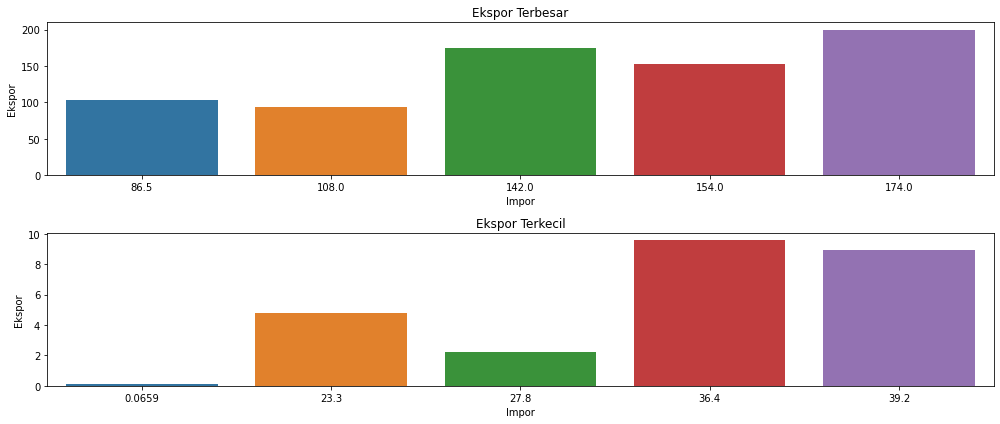

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.barplot(Ekspor1.Impor.head(), Ekspor1.Ekspor.head())
plt.title('Ekspor Terbesar')
plt.subplot(2,1,2)
sns.barplot(Ekspor1.Impor.tail(), Ekspor1.Ekspor.tail())
plt.title('Ekspor Terkecil')
plt.tight_layout()
plt.show()

#### Pendapatan - Harapan Hidup

In [ ]:
Pendapatan1 = df.sort_values('Pendapatan', ascending=False)
Pendapatan1

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
123,Qatar,9.0,62.30,1.81,23.8,125000.0,6.980,79.5,2.07,70300.0
91,Luxembourg,2.8,175.00,7.77,142.0,91700.0,3.620,81.3,1.63,105000.0
23,Brunei,10.5,67.40,2.84,28.0,80600.0,16.700,77.1,1.84,35300.0
82,Kuwait,10.8,66.70,2.63,30.4,75200.0,11.200,78.2,2.21,38500.0
133,Singapore,2.8,200.00,3.96,174.0,72100.0,-0.046,82.7,1.15,46600.0
...,...,...,...,...,...,...,...,...,...,...
31,Central African Republic,149.0,11.80,3.98,26.5,888.0,2.010,47.5,5.21,446.0
112,Niger,123.0,22.20,5.16,49.1,814.0,2.550,58.8,7.49,348.0
26,Burundi,93.6,8.92,11.60,39.2,764.0,12.300,57.7,6.26,231.0
88,Liberia,89.3,19.10,11.80,92.6,700.0,5.470,60.8,5.02,327.0


In [ ]:
min(df['Pendapatan'])

609.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


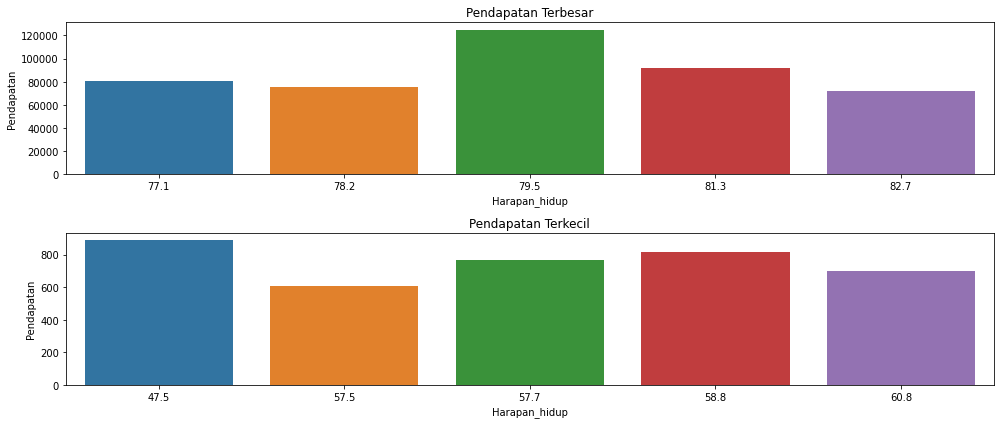

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.barplot(Pendapatan1.Harapan_hidup.head(), Pendapatan1.Pendapatan.head())
plt.title('Pendapatan Terbesar')
plt.subplot(2,1,2)
sns.barplot(Pendapatan1.Harapan_hidup.tail(), Pendapatan1.Pendapatan.tail())
plt.title('Pendapatan Terkecil')
plt.tight_layout()
plt.show()

#### Terkecil

#### Harapan Hidup - Kematian 

In [ ]:
Kematian = df.sort_values('Kematian_anak', ascending=False)
Kematian

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
66,Haiti,208.0,15.3,6.91,64.7,1500.0,5.450,32.1,3.33,662.0
132,Sierra Leone,160.0,16.8,13.10,34.5,1220.0,17.200,55.0,5.20,399.0
32,Chad,150.0,36.8,4.53,43.5,1930.0,6.390,56.5,6.59,897.0
31,Central African Republic,149.0,11.8,3.98,26.5,888.0,2.010,47.5,5.21,446.0
97,Mali,137.0,22.8,4.98,35.1,1870.0,4.370,59.5,6.55,708.0
...,...,...,...,...,...,...,...,...,...,...
53,Finland,3.0,38.7,8.95,37.4,39800.0,0.351,80.0,1.87,46200.0
144,Sweden,3.0,46.2,9.63,40.7,42900.0,0.991,81.5,1.98,52100.0
133,Singapore,2.8,200.0,3.96,174.0,72100.0,-0.046,82.7,1.15,46600.0
91,Luxembourg,2.8,175.0,7.77,142.0,91700.0,3.620,81.3,1.63,105000.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


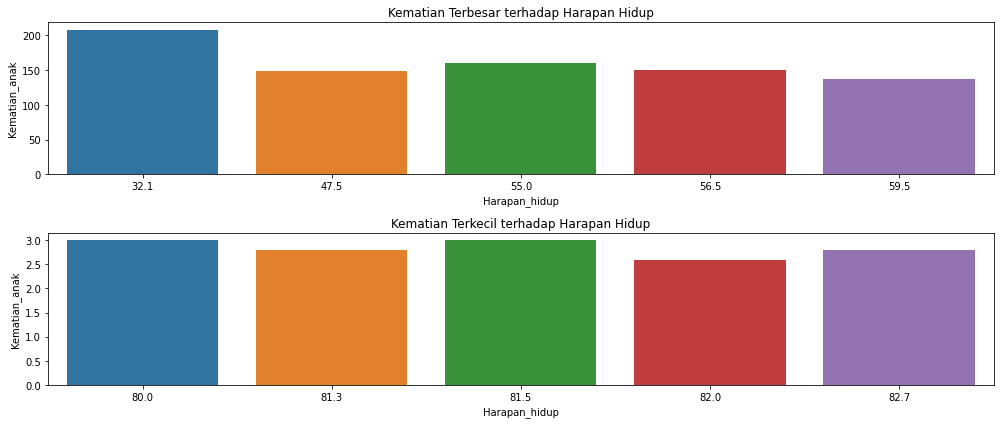

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.barplot(Kematian.Harapan_hidup.head(), Kematian.Kematian_anak.head())
plt.title('Kematian Terbesar terhadap Harapan Hidup')
plt.subplot(2,1,2)
sns.barplot(Kematian.Harapan_hidup.tail(), Kematian.Kematian_anak.tail())
plt.title('Kematian Terkecil terhadap Harapan Hidup')
plt.tight_layout()
plt.show()

#### Harapan_hidup - Jumlah_fertiliti

In [ ]:
Harapan_hidup1 = df.sort_values('Kematian_anak', ascending=False)
Harapan_hidup1

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
66,Haiti,208.0,15.3,6.91,64.7,1500.0,5.450,32.1,3.33,662.0
132,Sierra Leone,160.0,16.8,13.10,34.5,1220.0,17.200,55.0,5.20,399.0
32,Chad,150.0,36.8,4.53,43.5,1930.0,6.390,56.5,6.59,897.0
31,Central African Republic,149.0,11.8,3.98,26.5,888.0,2.010,47.5,5.21,446.0
97,Mali,137.0,22.8,4.98,35.1,1870.0,4.370,59.5,6.55,708.0
...,...,...,...,...,...,...,...,...,...,...
53,Finland,3.0,38.7,8.95,37.4,39800.0,0.351,80.0,1.87,46200.0
144,Sweden,3.0,46.2,9.63,40.7,42900.0,0.991,81.5,1.98,52100.0
133,Singapore,2.8,200.0,3.96,174.0,72100.0,-0.046,82.7,1.15,46600.0
91,Luxembourg,2.8,175.0,7.77,142.0,91700.0,3.620,81.3,1.63,105000.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


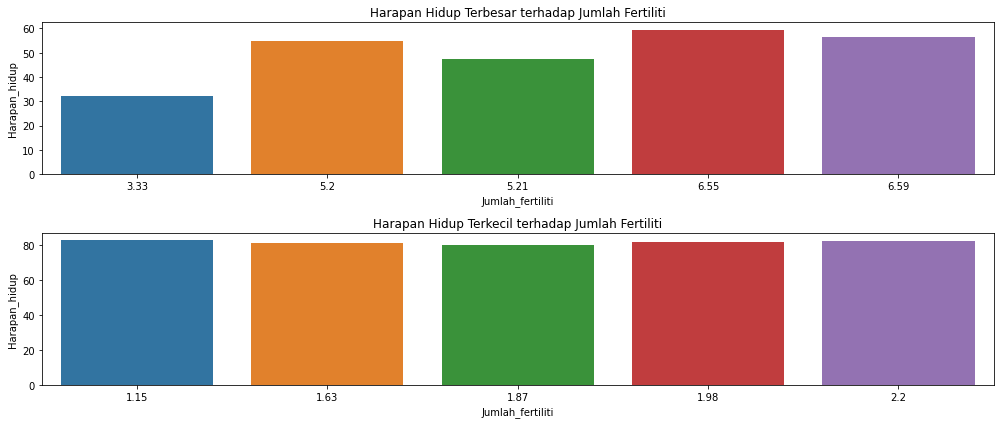

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.barplot(Harapan_hidup1.Jumlah_fertiliti.head(), Harapan_hidup1.Harapan_hidup.head())
plt.title('Harapan Hidup Terbesar terhadap Jumlah Fertiliti')
plt.subplot(2,1,2)
sns.barplot(Harapan_hidup1.Jumlah_fertiliti.tail(), Harapan_hidup1.Harapan_hidup.tail())
plt.title('Harapan Hidup Terkecil terhadap Jumlah Fertiliti')
plt.tight_layout()
plt.show()

### Multivariate

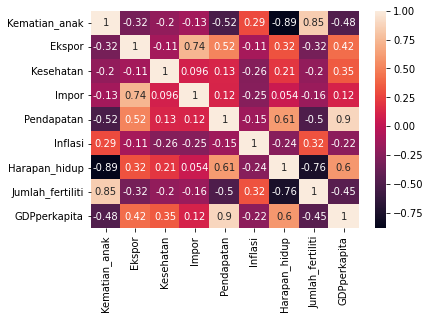

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt='.2g');

## Outlier Treatment

Ways of outlier treatment:
1. Trimming/Remove outliers
2. Quantile based flooring and capping
3. Median Imputation

link:
https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/

### Outlier Detection

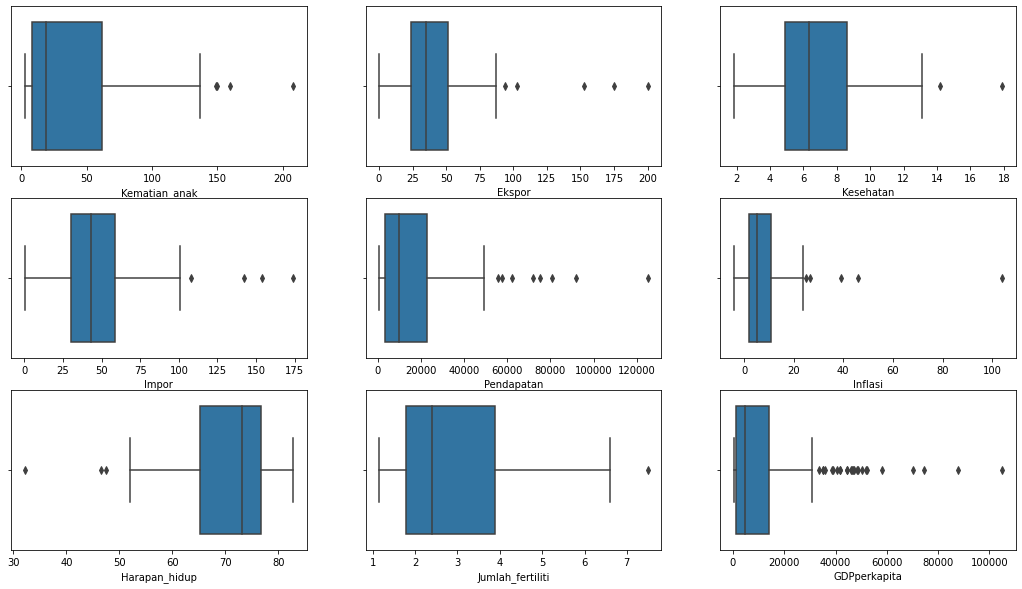

In [ ]:
fig, ax = plt.subplots(3,3,figsize=(18, 10))
sns.boxplot(ax=ax[0, 0], data=df, x='Kematian_anak')
sns.boxplot(ax=ax[0, 1], data=df, x='Ekspor')
sns.boxplot(ax=ax[0, 2], data=df, x='Kesehatan')

sns.boxplot(ax=ax[1, 0], data=df, x='Impor')
sns.boxplot(ax=ax[1, 1], data=df, x='Pendapatan')
sns.boxplot(ax=ax[1, 2], data=df, x='Inflasi')

sns.boxplot(ax=ax[2, 0], data=df, x='Harapan_hidup')
sns.boxplot(ax=ax[2, 1], data=df, x='Jumlah_fertiliti')
sns.boxplot(ax=ax[2, 2], data=df, x='GDPperkapita')


In [ ]:
def finding_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR  = Q3-Q1
  df_final = df[(df<(Q1-(1.5*IQR))) | (df>(Q3+(1.5*IQR)))]
  return df_final

In [ ]:
print(finding_outlier(df['Kematian_anak']))
print(finding_outlier(df['Ekspor']))
print(finding_outlier(df['Kesehatan']))
print(finding_outlier(df['Impor']))
print(finding_outlier(df['Pendapatan']))
print(finding_outlier(df['Inflasi']))
print(finding_outlier(df['Harapan_hidup']))
print(finding_outlier(df['Jumlah_fertiliti']))
print(finding_outlier(df['GDPperkapita']))

31     149.0
32     150.0
66     208.0
132    160.0
Name: Kematian_anak, dtype: float64
73     103.0
91     175.0
98     153.0
131     93.8
133    200.0
Name: Ekspor, dtype: float64
101    14.2
159    17.9
Name: Kesehatan, dtype: float64
91     142.0
98     154.0
131    108.0
133    174.0
Name: Impor, dtype: float64
23      80600.0
82      75200.0
91      91700.0
114     62300.0
123    125000.0
133     72100.0
145     55500.0
157     57600.0
Name: Pendapatan, dtype: float64
49      24.9
103     39.2
113    104.0
149     26.5
163     45.9
Name: Inflasi, dtype: float64
31    47.5
66    32.1
87    46.5
Name: Harapan_hidup, dtype: float64
112    7.49
Name: Jumlah_fertiliti, dtype: float64
7       51900.0
8       46900.0
15      44400.0
23      35300.0
29      47400.0
44      58000.0
53      46200.0
54      40600.0
58      41800.0
68      41900.0
73      48700.0
75      35800.0
77      44500.0
82      38500.0
91     105000.0
110     50300.0
111     33700.0
114     87800.0
123     70300.0
13

### Remove Outlier

In [ ]:
def remove_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR  = Q3-Q1
  df_final = df[~(df>(Q1-(1.5*IQR))) | (df<(Q3+(1.5*IQR)))]
  return df_final

In [ ]:
df3 = remove_outlier(df[['Kematian_anak', 'Ekspor','Kesehatan','Impor','Pendapatan','Inflasi','Harapan_hidup','Jumlah_fertiliti','GDPperkapita']])

df3.dropna(axis=0, inplace=True)
df3

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0
...,...,...,...,...,...,...,...,...,...
161,36.3,31.7,5.81,28.5,4240.0,16.50,68.8,2.34,1380.0
162,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0
164,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0
165,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0


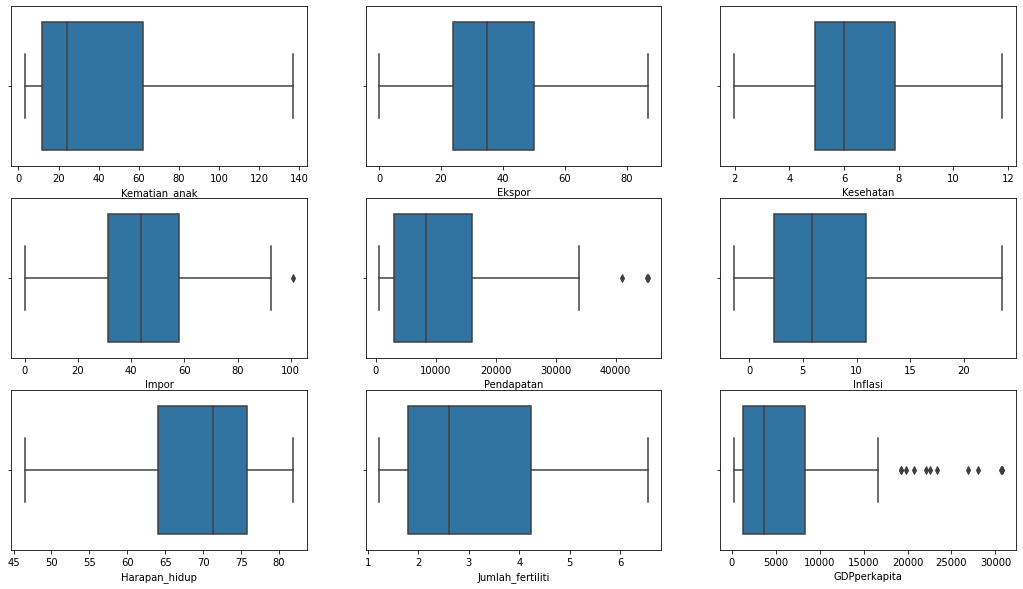

In [ ]:
fig2, ax2 = plt.subplots(3,3,figsize=(18, 10))
sns.boxplot(ax=ax2[0, 0], data=df3, x='Kematian_anak')
sns.boxplot(ax=ax2[0, 1], data=df3, x='Ekspor')
sns.boxplot(ax=ax2[0, 2], data=df3, x='Kesehatan')

sns.boxplot(ax=ax2[1, 0], data=df3, x='Impor')
sns.boxplot(ax=ax2[1, 1], data=df3, x='Pendapatan')
sns.boxplot(ax=ax2[1, 2], data=df3, x='Inflasi')

sns.boxplot(ax=ax2[2, 0], data=df3, x='Harapan_hidup')
sns.boxplot(ax=ax2[2, 1], data=df3, x='Jumlah_fertiliti')
sns.boxplot(ax=ax2[2, 2], data=df3, x='GDPperkapita')


## Scaling Data

### KMeans 1

In [ ]:
# feature scaling
sc = StandardScaler()
df_std = sc.fit_transform(df3)

In [ ]:
# clustering with KMeans

from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters = 2, random_state=42).fit(df_std)
labels1 = kmeans1.labels_
labels1

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1],
      dtype=int32)

In [ ]:
new_df = pd.DataFrame(data=df_std, columns=['Kematian_anak', 'Ekspor','Kesehatan','Impor','Pendapatan','Inflasi','Harapan_hidup','Jumlah_fertiliti','GDPperkapita'])
new_df['label1_kmeans'] = labels1
new_df

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans
0,1.492609,-1.471494,0.536055,-0.036074,-0.973550,0.348142,-1.745686,1.922744,-0.821294,1
1,-0.664447,-0.506321,0.075227,0.166098,-0.118393,-0.462824,0.889613,-0.943787,-0.323232,0
2,-0.350853,0.051335,-0.989600,-0.773730,0.186874,1.439258,0.915835,-0.091389,-0.271131,0
3,2.336675,1.332871,-1.580176,-0.145357,-0.532610,2.471396,-1.234360,2.156465,-0.402089,1
4,-0.849086,0.432042,-0.157425,0.728903,0.824131,-0.962509,0.955168,-0.613826,0.818776,0
...,...,...,...,...,...,...,...,...,...,...
124,-0.087083,-0.307924,-0.255854,-0.932190,-0.703230,1.504791,-0.093708,-0.469469,-0.704841,1
125,-0.295168,0.491025,-0.506401,0.390127,-0.835821,-0.769188,-0.854142,0.327935,-0.480945,1
126,-0.468085,1.852992,0.204974,1.892760,-0.677534,0.783933,0.470063,-0.737561,-0.714698,0
127,0.499074,-0.399079,-0.537720,-0.609807,-0.678562,2.667993,-0.264150,1.132214,-0.714698,1


In [ ]:
print(max(new_df['label1_kmeans']))

1


'Kematian_anak', 'Ekspor','Kesehatan','Impor','Pendapatan','Inflasi','Harapan_hidup','Jumlah_fertiliti','GDPperkapita'


##### Ekspor - Impor

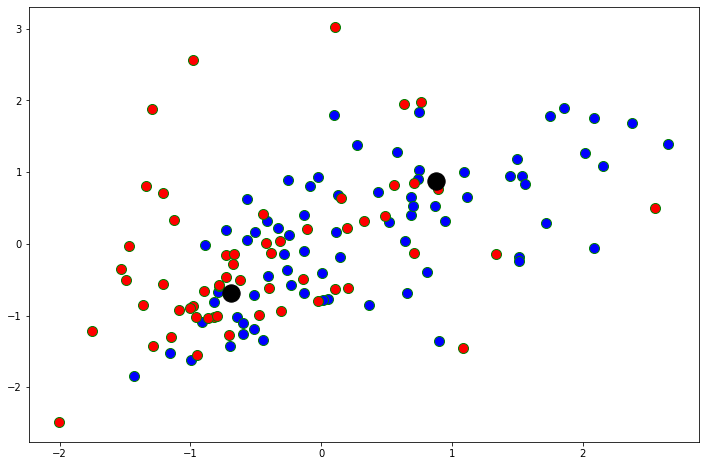

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(new_df['Ekspor'][new_df.label1_kmeans==0], new_df['Impor'][new_df.label1_kmeans==0], c='blue', s=100, edgecolors='green')
plt.scatter(new_df['Ekspor'][new_df.label1_kmeans==1], new_df['Impor'][new_df.label1_kmeans==1], c='red', s=100, edgecolors='green')

plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,0], c='k', s=300)

plt.show()

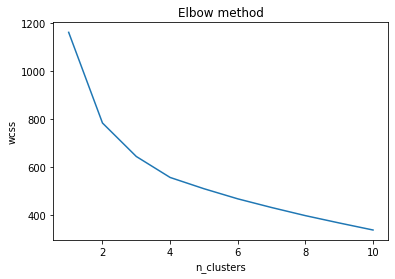

In [ ]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=189)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('n_clusters')
plt.ylabel('wcss')

plt.show()

### KMeans 2

In [ ]:
kmeans2 = KMeans(n_clusters = 4, init='k-means++', random_state=42)
kmeans2.fit(df_std)
labels2 = kmeans2.labels_

In [ ]:
new_df['label2_kmeans'] = labels2
new_df

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
0,1.492609,-1.471494,0.536055,-0.036074,-0.973550,0.348142,-1.745686,1.922744,-0.821294,1,2
1,-0.664447,-0.506321,0.075227,0.166098,-0.118393,-0.462824,0.889613,-0.943787,-0.323232,0,3
2,-0.350853,0.051335,-0.989600,-0.773730,0.186874,1.439258,0.915835,-0.091389,-0.271131,0,0
3,2.336675,1.332871,-1.580176,-0.145357,-0.532610,2.471396,-1.234360,2.156465,-0.402089,1,2
4,-0.849086,0.432042,-0.157425,0.728903,0.824131,-0.962509,0.955168,-0.613826,0.818776,0,1
...,...,...,...,...,...,...,...,...,...,...,...
124,-0.087083,-0.307924,-0.255854,-0.932190,-0.703230,1.504791,-0.093708,-0.469469,-0.704841,1,0
125,-0.295168,0.491025,-0.506401,0.390127,-0.835821,-0.769188,-0.854142,0.327935,-0.480945,1,3
126,-0.468085,1.852992,0.204974,1.892760,-0.677534,0.783933,0.470063,-0.737561,-0.714698,0,3
127,0.499074,-0.399079,-0.537720,-0.609807,-0.678562,2.667993,-0.264150,1.132214,-0.714698,1,0


In [ ]:
print(max(new_df['label2_kmeans']))

3


In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df_std, labels= labels1))
print(silhouette_score(df_std, labels= labels2))

0.2767052547285692
0.21523503933978452


#### Ekspor Impor

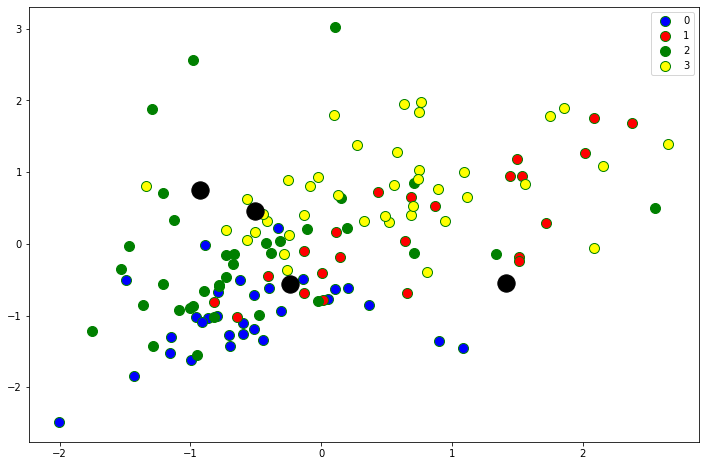

In [ ]:
plt.figure(figsize=(12,8))

plt.scatter(new_df['Ekspor'][new_df.label2_kmeans==0], new_df['Impor'][new_df.label2_kmeans==0], label='0', c='blue', s=100, edgecolors='green')
plt.scatter(new_df['Ekspor'][new_df.label2_kmeans==1], new_df['Impor'][new_df.label2_kmeans==1], label='1', c='red', s=100, edgecolors='green')
plt.scatter(new_df['Ekspor'][new_df.label2_kmeans==2], new_df['Impor'][new_df.label2_kmeans==2], label='2', c='green', s=100, edgecolors='green')
plt.scatter(new_df['Ekspor'][new_df.label2_kmeans==3], new_df['Impor'][new_df.label2_kmeans==3], label ='3', c='yellow', s=100, edgecolors='green')

plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
plt.legend()
plt.show()

## Inverse Transform

In [ ]:
from sklearn.cluster import KMeans
kmeansa = KMeans(n_clusters = 2, random_state=42)
kmeansa.fit(sc.inverse_transform(df_std))
labelsa = kmeansa.labels_
labelsa

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
kmeansb = KMeans(n_clusters = 4, init='k-means++', random_state=42)
kmeansb = kmeansb.fit(df_std)
labelsb = kmeansb.labels_
labelsb

array([2, 3, 0, 2, 1, 0, 0, 0, 1, 1, 0, 1, 3, 3, 2, 3, 0, 3, 3, 0, 3, 2,
       2, 3, 2, 3, 1, 0, 0, 2, 2, 2, 3, 2, 1, 1, 1, 0, 0, 0, 3, 2, 1, 3,
       0, 2, 3, 2, 1, 3, 0, 2, 2, 3, 1, 0, 0, 0, 0, 1, 0, 3, 0, 2, 2, 3,
       2, 1, 3, 2, 2, 1, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 2, 0, 3, 0,
       1, 2, 3, 3, 0, 0, 1, 1, 3, 0, 2, 3, 1, 2, 3, 1, 1, 3, 2, 1, 1, 0,
       3, 2, 3, 2, 2, 3, 2, 3, 3, 0, 3, 2, 3, 0, 0, 3, 3, 0, 2],
      dtype=int32)

In [ ]:
new_df1 = pd.DataFrame(data=sc.inverse_transform(df_std), columns=['Kematian_anak', 'Ekspor','Kesehatan','Impor','Pendapatan','Inflasi','Harapan_hidup','Jumlah_fertiliti','GDPperkapita'])
new_df1['label1_kmeans'] = labelsa
new_df1['label2_kmeans'] = labelsb
new_df1

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
0,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,1,2
1,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,1,3
2,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,1,0
3,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,1,2
4,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
124,36.3,31.7,5.81,28.5,4240.0,16.50,68.8,2.34,1380.0,1,0
125,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0,1,3
126,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0,1,3
127,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0,1,0


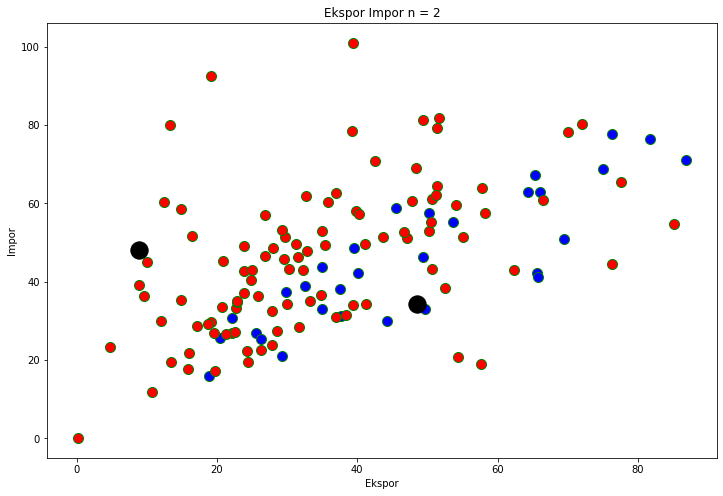

In [ ]:
plt.figure(figsize=(12,8))

plt.scatter(new_df1['Ekspor'][new_df1.label1_kmeans == 0], new_df1['Impor'][new_df1.label1_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(new_df1['Ekspor'][new_df1.label1_kmeans == 1], new_df1['Impor'][new_df1.label1_kmeans == 1], c='red', s=100, edgecolor='green')

plt.scatter(kmeansa.cluster_centers_[:, 0],kmeansa.cluster_centers_[:, 1], c='k', s=300 )
plt.title('Ekspor Impor n = 2')
plt.xlabel('Ekspor')
plt.ylabel('Impor')
plt.show()

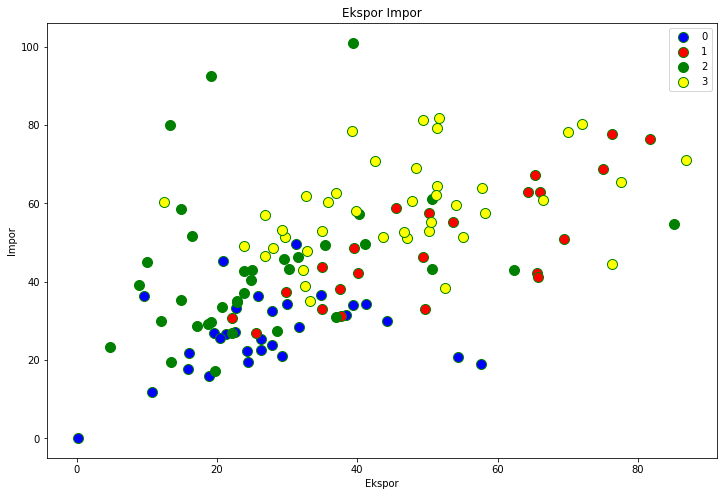

In [ ]:
plt.figure(figsize=(12,8))

plt.scatter(new_df1['Ekspor'][new_df1.label2_kmeans == 0], new_df1['Impor'][new_df1.label2_kmeans == 0], c='blue', label='0', s=100, edgecolor='green')
plt.scatter(new_df1['Ekspor'][new_df1.label2_kmeans == 1], new_df1['Impor'][new_df1.label2_kmeans == 1], c='red', label='1', s=100, edgecolor='green')
plt.scatter(new_df1['Ekspor'][new_df1.label2_kmeans == 2], new_df1['Impor'][new_df1.label2_kmeans == 2], c='green',label = '2', s=100, edgecolor='green')
plt.scatter(new_df1['Ekspor'][new_df1.label2_kmeans == 3], new_df1['Impor'][new_df1.label2_kmeans == 3], c='yellow', label = '3', s=100, edgecolor='green')

#plt.scatter(kmeansb.cluster_centers_[:, 0],kmeansb.cluster_centers_[:, 1], c='k', s=300 )
plt.legend()
plt.title('Ekspor Impor')
plt.xlabel('Ekspor')
plt.ylabel('Impor')
plt.show()

## Summary K2Means Join Outer

In [ ]:
#summary to main data
df4 = pd.merge(df,new_df1, how='outer')

df4['label2_kmeans'] = df4['label2_kmeans'].astype('object')
df4

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,1.0,2
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,1.0,3
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,1.0,0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,NaN,NaN
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
226,NaN,14.9,66.5,3.88,60.8,13500.0,4.08,76.6,1.55,5080.0,1.0,3
227,NaN,90.3,40.2,7.65,57.3,1210.0,1.18,58.7,4.87,488.0,1.0,2
228,NaN,17.4,12.4,5.07,60.3,4980.0,3.68,69.9,3.91,3550.0,1.0,3
229,NaN,62.0,76.3,2.50,44.5,9940.0,2.31,67.9,2.83,4440.0,1.0,3


### Pendapatan - GDPperkapita

In [ ]:
# Pendapatan
top_Pendapatan = df4[df4['label2_kmeans']==0]
top_Pendapatan.sort_values(by=['Pendapatan'],ascending=True)[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
210,NaN,47.0,9.580,5.25,36.4000,1990.0,15.10,68.3,2.61,592.0,1.0,0
12,Bangladesh,49.4,16.000,3.52,21.8000,2440.0,7.14,70.4,2.33,758.0,1.0,0
209,NaN,64.4,0.109,1.97,0.0659,3720.0,7.04,66.8,2.41,988.0,1.0,0
161,Uzbekistan,36.3,31.700,5.81,28.5000,4240.0,16.50,68.8,2.34,1380.0,1.0,0
194,NaN,58.8,22.600,4.05,27.1000,4410.0,8.98,66.2,2.60,1350.0,1.0,0
165,Yemen,56.3,30.000,5.18,34.4000,4480.0,23.60,67.5,4.67,1310.0,1.0,0
19,Bolivia,46.6,41.200,4.84,34.3000,5410.0,8.78,71.6,3.20,1980.0,1.0,0
212,NaN,31.9,34.800,3.61,36.6000,5600.0,4.22,69.0,3.16,2130.0,1.0,0
6,Armenia,18.1,20.800,4.40,45.3000,6700.0,7.77,73.3,1.69,3220.0,1.0,0
191,NaN,35.4,25.800,6.85,36.3000,6710.0,5.14,71.3,3.38,2830.0,1.0,0


In [ ]:
df[(df['Pendapatan'] == 1990)]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
109,Nepal,47.0,9.58,5.25,36.4,1990.0,15.1,68.3,2.61,592.0


In [ ]:
# GDPperkapita
top_Pendapatan = df4[df4['label2_kmeans']==0]
top_Pendapatan.sort_values(by=['GDPperkapita'],ascending=True)[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
210,NaN,47.0,9.580,5.25,36.4000,1990.0,15.10,68.3,2.61,592.0,1.0,0
12,Bangladesh,49.4,16.000,3.52,21.8000,2440.0,7.14,70.4,2.33,758.0,1.0,0
209,NaN,64.4,0.109,1.97,0.0659,3720.0,7.04,66.8,2.41,988.0,1.0,0
165,Yemen,56.3,30.000,5.18,34.4000,4480.0,23.60,67.5,4.67,1310.0,1.0,0
194,NaN,58.8,22.600,4.05,27.1000,4410.0,8.98,66.2,2.60,1350.0,1.0,0
161,Uzbekistan,36.3,31.700,5.81,28.5000,4240.0,16.50,68.8,2.34,1380.0,1.0,0
19,Bolivia,46.6,41.200,4.84,34.3000,5410.0,8.78,71.6,3.20,1980.0,1.0,0
212,NaN,31.9,34.800,3.61,36.6000,5600.0,4.22,69.0,3.16,2130.0,1.0,0
47,Egypt,29.1,21.300,4.66,26.6000,9860.0,10.10,70.5,3.19,2600.0,1.0,0
223,NaN,11.2,19.600,2.94,26.8000,8560.0,22.80,74.4,2.20,2810.0,1.0,0


In [ ]:
df[(df['GDPperkapita'] == 988)]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
107,Myanmar,64.4,0.109,1.97,0.0659,3720.0,7.04,66.8,2.41,988.0


#### KMeans 1

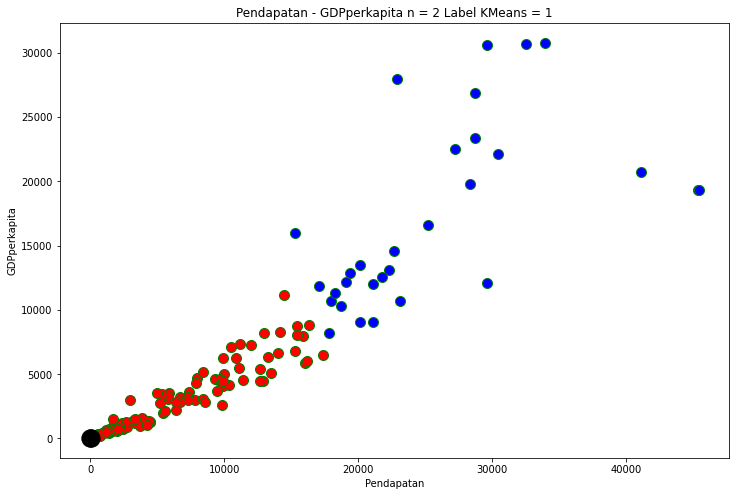

In [ ]:
plt.figure(figsize=(12,8))

plt.scatter(df4['Pendapatan'][df4.label1_kmeans == 0], df4['GDPperkapita'][df4.label1_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(df4['Pendapatan'][df4.label1_kmeans == 1], df4['GDPperkapita'][df4.label1_kmeans == 1], c='red', s=100, edgecolor='green')

plt.scatter(kmeansa.cluster_centers_[:, 0],kmeansa.cluster_centers_[:, 1], c='k', s=300 )
plt.title('Pendapatan - GDPperkapita n = 2 Label KMeans = 1')
plt.xlabel('Pendapatan')
plt.ylabel('GDPperkapita')
plt.show()

#### KMeans 2

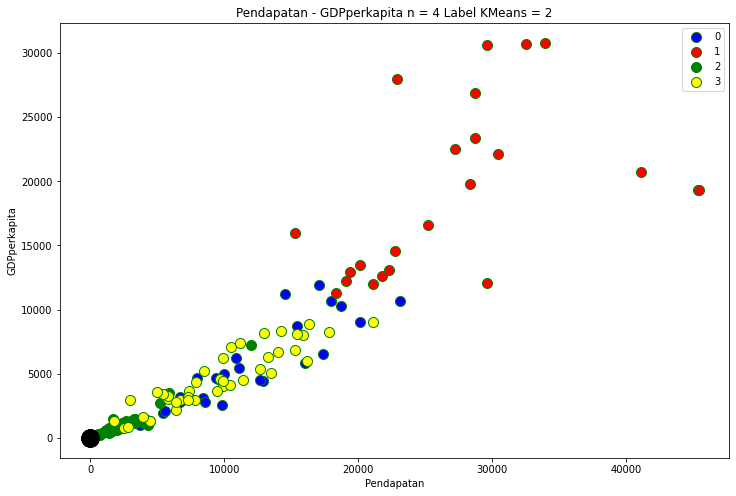

In [ ]:
plt.figure(figsize=(12,8))

plt.scatter(df4['Pendapatan'][df4.label2_kmeans==0], df4['GDPperkapita'][df4.label2_kmeans==0], label='0', c='blue', s=100, edgecolors='green')
plt.scatter(df4['Pendapatan'][df4.label2_kmeans==1], df4['GDPperkapita'][df4.label2_kmeans==1], label='1', c='red', s=100, edgecolors='green')
plt.scatter(df4['Pendapatan'][df4.label2_kmeans==2], df4['GDPperkapita'][df4.label2_kmeans==2], label='2', c='green', s=100, edgecolors='green')
plt.scatter(df4['Pendapatan'][df4.label2_kmeans==3], df4['GDPperkapita'][df4.label2_kmeans==3], label ='3', c='yellow', s=100, edgecolors='green')

plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
plt.title('Pendapatan - GDPperkapita n = 4 Label KMeans = 2')
plt.xlabel('Pendapatan')
plt.ylabel('GDPperkapita')
plt.legend()
plt.show()

### Kematian_anak - Jumlah fertiliti

In [ ]:
# Kematian_anak - Jumlah_fertiliti
top_Kematian_anak = df4[df4['label2_kmeans']==0]
top_Kematian_anak.sort_values(by=['Kematian_anak'],ascending=False)[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
209,NaN,64.4,0.109,1.97,0.0659,3720.0,7.04,66.8,2.41,988.0,1.0,0
55,Gabon,63.7,57.700,3.50,18.9000,15400.0,16.60,62.9,4.08,8750.0,1.0,0
194,NaN,58.8,22.600,4.05,27.1000,4410.0,8.98,66.2,2.60,1350.0,1.0,0
165,Yemen,56.3,30.000,5.18,34.4000,4480.0,23.60,67.5,4.67,1310.0,1.0,0
12,Bangladesh,49.4,16.000,3.52,21.8000,2440.0,7.14,70.4,2.33,758.0,1.0,0
210,NaN,47.0,9.580,5.25,36.4000,1990.0,15.10,68.3,2.61,592.0,1.0,0
19,Bolivia,46.6,41.200,4.84,34.3000,5410.0,8.78,71.6,3.20,1980.0,1.0,0
9,Azerbaijan,39.2,54.300,5.88,20.7000,16000.0,13.80,69.1,1.92,5840.0,1.0,0
72,Iraq,36.9,39.400,8.41,34.1000,12700.0,16.60,67.2,4.56,4500.0,1.0,0
161,Uzbekistan,36.3,31.700,5.81,28.5000,4240.0,16.50,68.8,2.34,1380.0,1.0,0


In [ ]:
df[(df['Kematian_anak'] == 64.4)]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
107,Myanmar,64.4,0.109,1.97,0.0659,3720.0,7.04,66.8,2.41,988.0


In [ ]:
# Harapan_anak terkecil
top_Kematian_anak = df4[df4['label2_kmeans']==0]
top_Kematian_anak.sort_values(by=['Jumlah_fertiliti'],ascending=False)[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
165,Yemen,56.3,30.00,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0,1.0,0
72,Iraq,36.9,39.40,8.41,34.1,12700.0,16.60,67.2,4.56,4500.0,1.0,0
55,Gabon,63.7,57.70,3.50,18.9,15400.0,16.60,62.9,4.08,8750.0,1.0,0
191,NaN,35.4,25.80,6.85,36.3,6710.0,5.14,71.3,3.38,2830.0,1.0,0
19,Bolivia,46.6,41.20,4.84,34.3,5410.0,8.78,71.6,3.20,1980.0,1.0,0
47,Egypt,29.1,21.30,4.66,26.6,9860.0,10.10,70.5,3.19,2600.0,1.0,0
212,NaN,31.9,34.80,3.61,36.6,5600.0,4.22,69.0,3.16,2130.0,1.0,0
2,Algeria,27.3,38.40,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,1.0,0
46,Ecuador,25.1,27.90,8.06,32.4,9350.0,7.47,76.7,2.66,4660.0,1.0,0
210,NaN,47.0,9.58,5.25,36.4,1990.0,15.10,68.3,2.61,592.0,1.0,0


#### KMeans 1

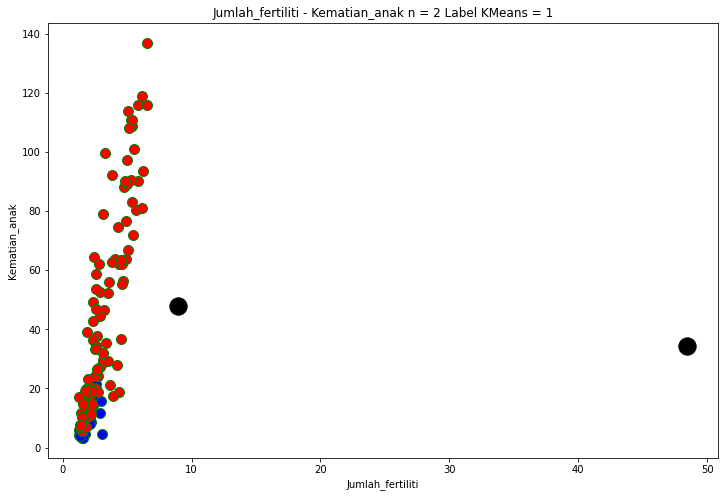

In [ ]:
plt.figure(figsize=(12,8))

plt.scatter(df4['Jumlah_fertiliti'][df4.label1_kmeans == 0], df4['Kematian_anak'][df4.label1_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(df4['Jumlah_fertiliti'][df4.label1_kmeans == 1], df4['Kematian_anak'][df4.label1_kmeans == 1], c='red', s=100, edgecolor='green')

plt.scatter(kmeansa.cluster_centers_[:, 0],kmeansa.cluster_centers_[:, 1], c='k', s=300 )
plt.title('Jumlah_fertiliti - Kematian_anak n = 2 Label KMeans = 1')
plt.xlabel('Jumlah_fertiliti')
plt.ylabel('Kematian_anak')
plt.show()

#### KMeans 2

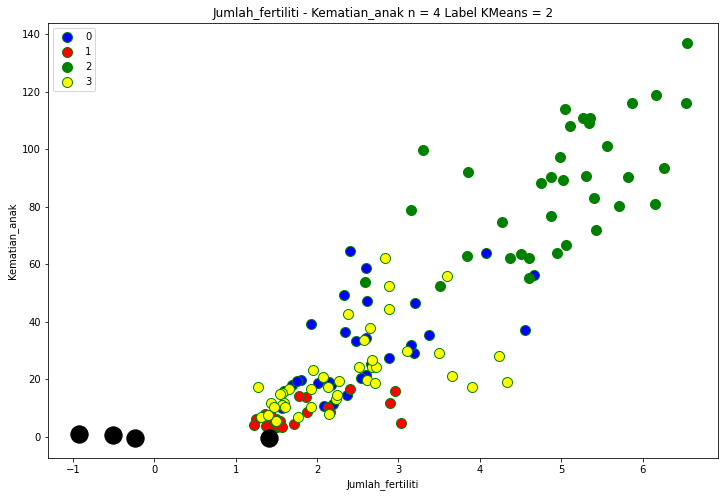

In [ ]:
plt.figure(figsize=(12,8))

plt.scatter(df4['Jumlah_fertiliti'][df4.label2_kmeans==0], df4['Kematian_anak'][df4.label2_kmeans==0], label='0', c='blue', s=100, edgecolors='green')
plt.scatter(df4['Jumlah_fertiliti'][df4.label2_kmeans==1], df4['Kematian_anak'][df4.label2_kmeans==1], label='1', c='red', s=100, edgecolors='green')
plt.scatter(df4['Jumlah_fertiliti'][df4.label2_kmeans==2], df4['Kematian_anak'][df4.label2_kmeans==2], label='2', c='green', s=100, edgecolors='green')
plt.scatter(df4['Jumlah_fertiliti'][df4.label2_kmeans==3], df4['Kematian_anak'][df4.label2_kmeans==3], label ='3', c='yellow', s=100, edgecolors='green')

plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
plt.title('Jumlah_fertiliti - Kematian_anak n = 4 Label KMeans = 2')
plt.xlabel('Jumlah_fertiliti')
plt.ylabel('Kematian_anak')
plt.legend()
plt.show()

### Ekspor Impor

In [ ]:
top_Impor = df4[df4['label2_kmeans']==0]
top_Impor

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
2,Algeria,27.3,38.400,4.17,31.4000,12900.0,16.10,76.5,2.89,4460.0,1.0,0
5,Argentina,14.5,18.900,8.10,16.0000,18700.0,20.90,75.8,2.37,10300.0,0.0,0
6,Armenia,18.1,20.800,4.40,45.3000,6700.0,7.77,73.3,1.69,3220.0,1.0,0
9,Azerbaijan,39.2,54.300,5.88,20.7000,16000.0,13.80,69.1,1.92,5840.0,1.0,0
12,Bangladesh,49.4,16.000,3.52,21.8000,2440.0,7.14,70.4,2.33,758.0,1.0,0
19,Bolivia,46.6,41.200,4.84,34.3000,5410.0,8.78,71.6,3.20,1980.0,1.0,0
34,China,15.7,26.300,5.07,22.6000,9530.0,6.94,74.6,1.59,4560.0,1.0,0
46,Ecuador,25.1,27.900,8.06,32.4000,9350.0,7.47,76.7,2.66,4660.0,1.0,0
47,Egypt,29.1,21.300,4.66,26.6000,9860.0,10.10,70.5,3.19,2600.0,1.0,0
55,Gabon,63.7,57.700,3.50,18.9000,15400.0,16.60,62.9,4.08,8750.0,1.0,0


In [ ]:
# Top Impor
top_Impor.sort_values(by=['Impor'],ascending=False)[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
76,Jamaica,18.1,31.30,4.81,49.6,8000.0,9.81,74.7,2.17,4680.0,1.0,0
6,Armenia,18.1,20.80,4.40,45.3,6700.0,7.77,73.3,1.69,3220.0,1.0,0
212,NaN,31.9,34.80,3.61,36.6,5600.0,4.22,69.0,3.16,2130.0,1.0,0
210,NaN,47.0,9.58,5.25,36.4,1990.0,15.10,68.3,2.61,592.0,1.0,0
191,NaN,35.4,25.80,6.85,36.3,6710.0,5.14,71.3,3.38,2830.0,1.0,0
165,Yemen,56.3,30.00,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0,1.0,0
19,Bolivia,46.6,41.20,4.84,34.3,5410.0,8.78,71.6,3.20,1980.0,1.0,0
72,Iraq,36.9,39.40,8.41,34.1,12700.0,16.60,67.2,4.56,4500.0,1.0,0
185,NaN,34.4,22.70,6.22,33.3,11100.0,5.44,74.6,2.60,5450.0,1.0,0
46,Ecuador,25.1,27.90,8.06,32.4,9350.0,7.47,76.7,2.66,4660.0,1.0,0


In [ ]:
# Top Ekspor
top_Impor.sort_values(by=['Ekspor'],ascending=False)[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
55,Gabon,63.7,57.7,3.50,18.9,15400.0,16.60,62.9,4.08,8750.0,1.0,0
9,Azerbaijan,39.2,54.3,5.88,20.7,16000.0,13.80,69.1,1.92,5840.0,1.0,0
79,Kazakhstan,21.5,44.2,4.29,29.9,20100.0,19.50,68.4,2.60,9070.0,0.0,0
19,Bolivia,46.6,41.2,4.84,34.3,5410.0,8.78,71.6,3.20,1980.0,1.0,0
72,Iraq,36.9,39.4,8.41,34.1,12700.0,16.60,67.2,4.56,4500.0,1.0,0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,1.0,0
212,NaN,31.9,34.8,3.61,36.6,5600.0,4.22,69.0,3.16,2130.0,1.0,0
161,Uzbekistan,36.3,31.7,5.81,28.5,4240.0,16.50,68.8,2.34,1380.0,1.0,0
76,Jamaica,18.1,31.3,4.81,49.6,8000.0,9.81,74.7,2.17,4680.0,1.0,0
165,Yemen,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0,1.0,0


#### KMeans 1

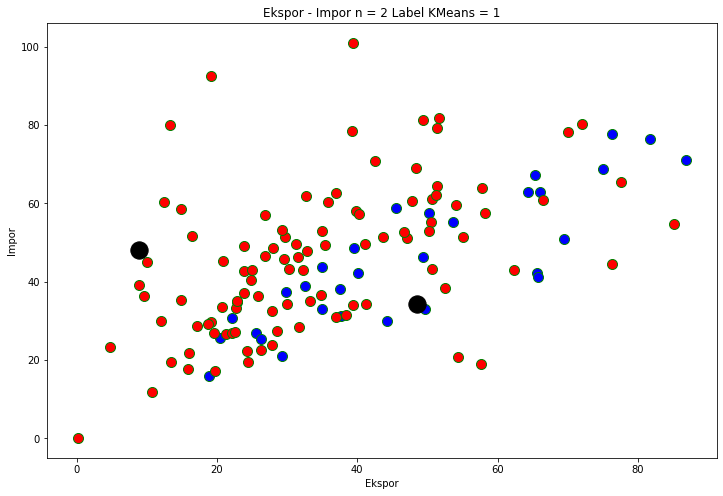

In [ ]:
plt.figure(figsize=(12,8))

plt.scatter(df4['Ekspor'][df4.label1_kmeans == 0], df4['Impor'][df4.label1_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(df4['Ekspor'][df4.label1_kmeans == 1], df4['Impor'][df4.label1_kmeans == 1], c='red', s=100, edgecolor='green')

plt.scatter(kmeansa.cluster_centers_[:, 0],kmeansa.cluster_centers_[:, 1], c='k', s=300 )
plt.title('Ekspor - Impor n = 2 Label KMeans = 1')
plt.xlabel('Ekspor')
plt.ylabel('Impor')
plt.show()

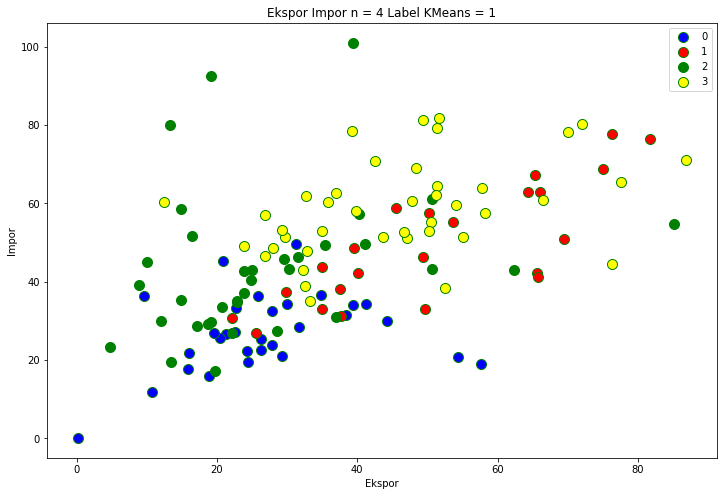

In [ ]:
plt.figure(figsize=(12,8))

plt.scatter(df4['Ekspor'][df4.label2_kmeans == 0], df4['Impor'][df4.label2_kmeans == 0], c='blue', label='0', s=100, edgecolor='green')
plt.scatter(df4['Ekspor'][df4.label2_kmeans == 1], df4['Impor'][df4.label2_kmeans == 1], c='red', label='1', s=100, edgecolor='green')
plt.scatter(df4['Ekspor'][df4.label2_kmeans == 2], df4['Impor'][df4.label2_kmeans == 2], c='green',label = '2', s=100, edgecolor='green')
plt.scatter(df4['Ekspor'][df4.label2_kmeans == 3], df4['Impor'][df4.label2_kmeans == 3], c='yellow', label = '3', s=100, edgecolor='green')

#plt.scatter(kmeansb.cluster_centers_[:, 0],kmeansb.cluster_centers_[:, 1], c='k', s=300 )
plt.legend()
plt.title('Ekspor Impor n = 4 Label KMeans = 1')
plt.xlabel('Ekspor')
plt.ylabel('Impor')
plt.show()

#### KMeans 2

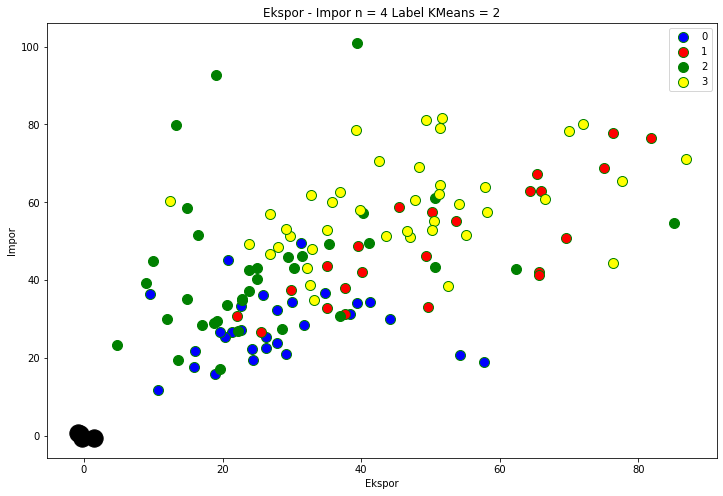

In [ ]:
plt.figure(figsize=(12,8))

plt.scatter(df4['Ekspor'][df4.label2_kmeans==0], df4['Impor'][df4.label2_kmeans==0], label='0', c='blue', s=100, edgecolors='green')
plt.scatter(df4['Ekspor'][df4.label2_kmeans==1], df4['Impor'][df4.label2_kmeans==1], label='1', c='red', s=100, edgecolors='green')
plt.scatter(df4['Ekspor'][df4.label2_kmeans==2], df4['Impor'][df4.label2_kmeans==2], label='2', c='green', s=100, edgecolors='green')
plt.scatter(df4['Ekspor'][df4.label2_kmeans==3], df4['Impor'][df4.label2_kmeans==3], label ='3', c='yellow', s=100, edgecolors='green')

plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
plt.title('Ekspor - Impor n = 4 Label KMeans = 2')
plt.xlabel('Ekspor')
plt.ylabel('Impor')
plt.legend()
plt.show()

### Harapan_hidup - Kematian_anak

In [ ]:
top_Harapan_hidup = df4[df4['label2_kmeans']==0]
top_Harapan_hidup

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
2,Algeria,27.3,38.400,4.17,31.4000,12900.0,16.10,76.5,2.89,4460.0,1.0,0
5,Argentina,14.5,18.900,8.10,16.0000,18700.0,20.90,75.8,2.37,10300.0,0.0,0
6,Armenia,18.1,20.800,4.40,45.3000,6700.0,7.77,73.3,1.69,3220.0,1.0,0
9,Azerbaijan,39.2,54.300,5.88,20.7000,16000.0,13.80,69.1,1.92,5840.0,1.0,0
12,Bangladesh,49.4,16.000,3.52,21.8000,2440.0,7.14,70.4,2.33,758.0,1.0,0
19,Bolivia,46.6,41.200,4.84,34.3000,5410.0,8.78,71.6,3.20,1980.0,1.0,0
34,China,15.7,26.300,5.07,22.6000,9530.0,6.94,74.6,1.59,4560.0,1.0,0
46,Ecuador,25.1,27.900,8.06,32.4000,9350.0,7.47,76.7,2.66,4660.0,1.0,0
47,Egypt,29.1,21.300,4.66,26.6000,9860.0,10.10,70.5,3.19,2600.0,1.0,0
55,Gabon,63.7,57.700,3.50,18.9000,15400.0,16.60,62.9,4.08,8750.0,1.0,0


In [ ]:
# Top Harapan Hidup
top_Harapan_hidup.sort_values(by=['Harapan_hidup'],ascending=True)[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
55,Gabon,63.7,57.700,3.50,18.9000,15400.0,16.60,62.9,4.08,8750.0,1.0,0
194,NaN,58.8,22.600,4.05,27.1000,4410.0,8.98,66.2,2.60,1350.0,1.0,0
209,NaN,64.4,0.109,1.97,0.0659,3720.0,7.04,66.8,2.41,988.0,1.0,0
72,Iraq,36.9,39.400,8.41,34.1000,12700.0,16.60,67.2,4.56,4500.0,1.0,0
165,Yemen,56.3,30.000,5.18,34.4000,4480.0,23.60,67.5,4.67,1310.0,1.0,0
210,NaN,47.0,9.580,5.25,36.4000,1990.0,15.10,68.3,2.61,592.0,1.0,0
79,Kazakhstan,21.5,44.200,4.29,29.9000,20100.0,19.50,68.4,2.60,9070.0,0.0,0
161,Uzbekistan,36.3,31.700,5.81,28.5000,4240.0,16.50,68.8,2.34,1380.0,1.0,0
212,NaN,31.9,34.800,3.61,36.6000,5600.0,4.22,69.0,3.16,2130.0,1.0,0
9,Azerbaijan,39.2,54.300,5.88,20.7000,16000.0,13.80,69.1,1.92,5840.0,1.0,0


In [ ]:
df[(df['Harapan_hidup'] == 66.2)]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
69,India,58.8,22.6,4.05,27.1,4410.0,8.98,66.2,2.60,1350.0
103,Mongolia,26.1,46.7,5.44,56.7,7710.0,39.20,66.2,2.64,2650.0


In [ ]:
# Top Kematian
top_Harapan_hidup.sort_values(by=['Kematian_anak'],ascending=False)[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
209,NaN,64.4,0.109,1.97,0.0659,3720.0,7.04,66.8,2.41,988.0,1.0,0
55,Gabon,63.7,57.700,3.50,18.9000,15400.0,16.60,62.9,4.08,8750.0,1.0,0
194,NaN,58.8,22.600,4.05,27.1000,4410.0,8.98,66.2,2.60,1350.0,1.0,0
165,Yemen,56.3,30.000,5.18,34.4000,4480.0,23.60,67.5,4.67,1310.0,1.0,0
12,Bangladesh,49.4,16.000,3.52,21.8000,2440.0,7.14,70.4,2.33,758.0,1.0,0
210,NaN,47.0,9.580,5.25,36.4000,1990.0,15.10,68.3,2.61,592.0,1.0,0
19,Bolivia,46.6,41.200,4.84,34.3000,5410.0,8.78,71.6,3.20,1980.0,1.0,0
9,Azerbaijan,39.2,54.300,5.88,20.7000,16000.0,13.80,69.1,1.92,5840.0,1.0,0
72,Iraq,36.9,39.400,8.41,34.1000,12700.0,16.60,67.2,4.56,4500.0,1.0,0
161,Uzbekistan,36.3,31.700,5.81,28.5000,4240.0,16.50,68.8,2.34,1380.0,1.0,0


#### KMeans 1

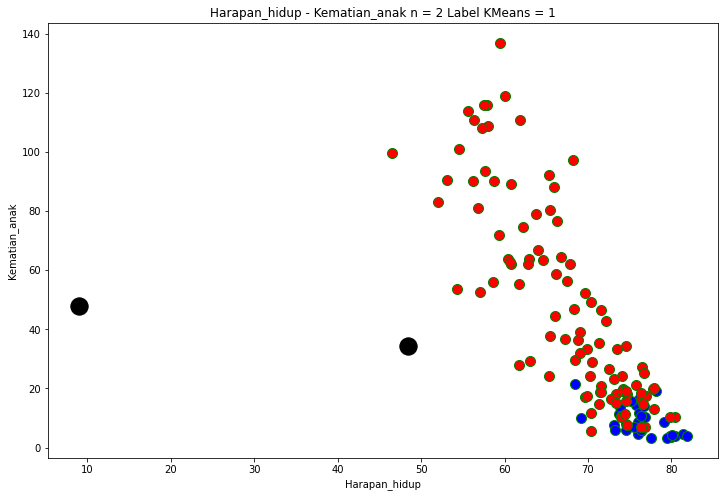

In [ ]:
plt.figure(figsize=(12,8))

plt.scatter(df4['Harapan_hidup'][df4.label1_kmeans == 0], df4['Kematian_anak'][df4.label1_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(df4['Harapan_hidup'][df4.label1_kmeans == 1], df4['Kematian_anak'][df4.label1_kmeans == 1], c='red', s=100, edgecolor='green')

plt.scatter(kmeansa.cluster_centers_[:, 0],kmeansa.cluster_centers_[:, 1], c='k', s=300 )
plt.title('Harapan_hidup - Kematian_anak n = 2 Label KMeans = 1')
plt.xlabel('Harapan_hidup')
plt.ylabel('Kematian_anak')
plt.show()

#### KMeans 2

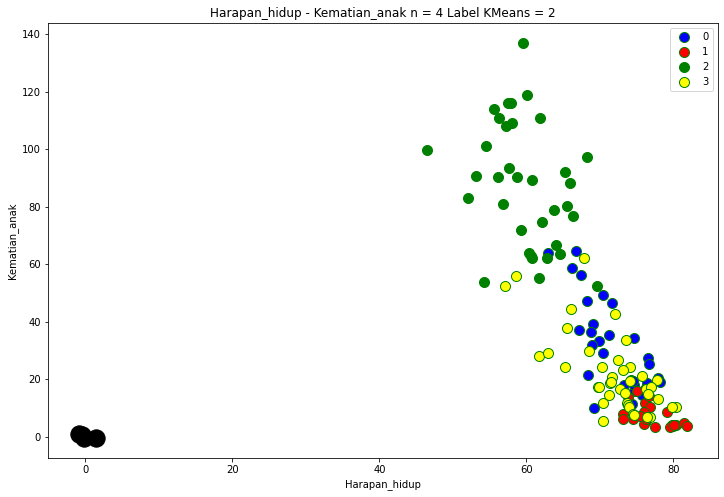

In [ ]:
plt.figure(figsize=(12,8))

plt.scatter(df4['Harapan_hidup'][df4.label2_kmeans==0], df4['Kematian_anak'][df4.label2_kmeans==0], label='0', c='blue', s=100, edgecolors='green')
plt.scatter(df4['Harapan_hidup'][df4.label2_kmeans==1], df4['Kematian_anak'][df4.label2_kmeans==1], label='1', c='red', s=100, edgecolors='green')
plt.scatter(df4['Harapan_hidup'][df4.label2_kmeans==2], df4['Kematian_anak'][df4.label2_kmeans==2], label='2', c='green', s=100, edgecolors='green')
plt.scatter(df4['Harapan_hidup'][df4.label2_kmeans==3], df4['Kematian_anak'][df4.label2_kmeans==3], label ='3', c='yellow', s=100, edgecolors='green')

plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
plt.title('Harapan_hidup - Kematian_anak n = 4 Label KMeans = 2')
plt.xlabel('Harapan_hidup')
plt.ylabel('Kematian_anak')
plt.legend()
plt.show()

### Jumlah Fertiliti - Harapan Hidup

In [ ]:
top_Jumlah_fertiliti = df4[df4['label2_kmeans']==0]
top_Jumlah_fertiliti

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
2,Algeria,27.3,38.400,4.17,31.4000,12900.0,16.10,76.5,2.89,4460.0,1.0,0
5,Argentina,14.5,18.900,8.10,16.0000,18700.0,20.90,75.8,2.37,10300.0,0.0,0
6,Armenia,18.1,20.800,4.40,45.3000,6700.0,7.77,73.3,1.69,3220.0,1.0,0
9,Azerbaijan,39.2,54.300,5.88,20.7000,16000.0,13.80,69.1,1.92,5840.0,1.0,0
12,Bangladesh,49.4,16.000,3.52,21.8000,2440.0,7.14,70.4,2.33,758.0,1.0,0
19,Bolivia,46.6,41.200,4.84,34.3000,5410.0,8.78,71.6,3.20,1980.0,1.0,0
34,China,15.7,26.300,5.07,22.6000,9530.0,6.94,74.6,1.59,4560.0,1.0,0
46,Ecuador,25.1,27.900,8.06,32.4000,9350.0,7.47,76.7,2.66,4660.0,1.0,0
47,Egypt,29.1,21.300,4.66,26.6000,9860.0,10.10,70.5,3.19,2600.0,1.0,0
55,Gabon,63.7,57.700,3.50,18.9000,15400.0,16.60,62.9,4.08,8750.0,1.0,0


In [ ]:
# Top Harapan_hidup
top_Jumlah_fertiliti.sort_values(by=['Harapan_hidup'],ascending=True)[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
55,Gabon,63.7,57.700,3.50,18.9000,15400.0,16.60,62.9,4.08,8750.0,1.0,0
194,NaN,58.8,22.600,4.05,27.1000,4410.0,8.98,66.2,2.60,1350.0,1.0,0
209,NaN,64.4,0.109,1.97,0.0659,3720.0,7.04,66.8,2.41,988.0,1.0,0
72,Iraq,36.9,39.400,8.41,34.1000,12700.0,16.60,67.2,4.56,4500.0,1.0,0
165,Yemen,56.3,30.000,5.18,34.4000,4480.0,23.60,67.5,4.67,1310.0,1.0,0
210,NaN,47.0,9.580,5.25,36.4000,1990.0,15.10,68.3,2.61,592.0,1.0,0
79,Kazakhstan,21.5,44.200,4.29,29.9000,20100.0,19.50,68.4,2.60,9070.0,0.0,0
161,Uzbekistan,36.3,31.700,5.81,28.5000,4240.0,16.50,68.8,2.34,1380.0,1.0,0
212,NaN,31.9,34.800,3.61,36.6000,5600.0,4.22,69.0,3.16,2130.0,1.0,0
9,Azerbaijan,39.2,54.300,5.88,20.7000,16000.0,13.80,69.1,1.92,5840.0,1.0,0


In [ ]:
# Top Fertiliti
top_Jumlah_fertiliti.sort_values(by=['Jumlah_fertiliti'],ascending=False)[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
165,Yemen,56.3,30.00,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0,1.0,0
72,Iraq,36.9,39.40,8.41,34.1,12700.0,16.60,67.2,4.56,4500.0,1.0,0
55,Gabon,63.7,57.70,3.50,18.9,15400.0,16.60,62.9,4.08,8750.0,1.0,0
191,NaN,35.4,25.80,6.85,36.3,6710.0,5.14,71.3,3.38,2830.0,1.0,0
19,Bolivia,46.6,41.20,4.84,34.3,5410.0,8.78,71.6,3.20,1980.0,1.0,0
47,Egypt,29.1,21.30,4.66,26.6,9860.0,10.10,70.5,3.19,2600.0,1.0,0
212,NaN,31.9,34.80,3.61,36.6,5600.0,4.22,69.0,3.16,2130.0,1.0,0
2,Algeria,27.3,38.40,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,1.0,0
46,Ecuador,25.1,27.90,8.06,32.4,9350.0,7.47,76.7,2.66,4660.0,1.0,0
210,NaN,47.0,9.58,5.25,36.4,1990.0,15.10,68.3,2.61,592.0,1.0,0


#### KMeans 1

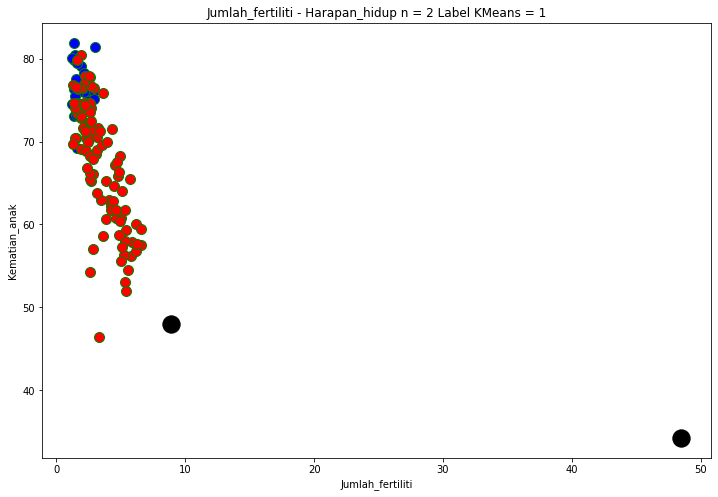

In [ ]:
plt.figure(figsize=(12,8))

plt.scatter(df4['Jumlah_fertiliti'][df4.label1_kmeans == 0], df4['Harapan_hidup'][df4.label1_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(df4['Jumlah_fertiliti'][df4.label1_kmeans == 1], df4['Harapan_hidup'][df4.label1_kmeans == 1], c='red', s=100, edgecolor='green')

plt.scatter(kmeansa.cluster_centers_[:, 0],kmeansa.cluster_centers_[:, 1], c='k', s=300 )
plt.title('Jumlah_fertiliti - Harapan_hidup n = 2 Label KMeans = 1')
plt.xlabel('Jumlah_fertiliti')
plt.ylabel('Kematian_anak')
plt.show()

#### Kmeans 2

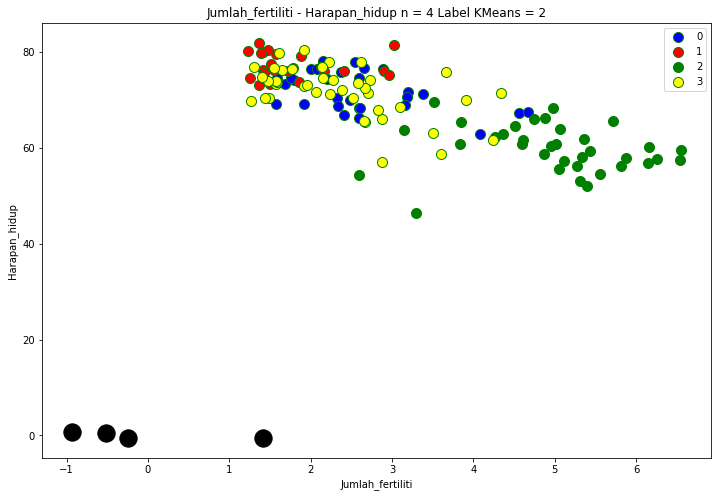

In [ ]:
plt.figure(figsize=(12,8))

plt.scatter(df4['Jumlah_fertiliti'][df4.label2_kmeans==0], df4['Harapan_hidup'][df4.label2_kmeans==0], label='0', c='blue', s=100, edgecolors='green')
plt.scatter(df4['Jumlah_fertiliti'][df4.label2_kmeans==1], df4['Harapan_hidup'][df4.label2_kmeans==1], label='1', c='red', s=100, edgecolors='green')
plt.scatter(df4['Jumlah_fertiliti'][df4.label2_kmeans==2], df4['Harapan_hidup'][df4.label2_kmeans==2], label='2', c='green', s=100, edgecolors='green')
plt.scatter(df4['Jumlah_fertiliti'][df4.label2_kmeans==3], df4['Harapan_hidup'][df4.label2_kmeans==3], label ='3', c='yellow', s=100, edgecolors='green')

plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
plt.title('Jumlah_fertiliti - Harapan_hidup n = 4 Label KMeans = 2')
plt.xlabel('Jumlah_fertiliti')
plt.ylabel('Harapan_hidup')
plt.legend()
plt.show()

## 3D Visualization

In [ ]:
df5 = remove_outlier(df[['Kematian_anak', 'Ekspor','Kesehatan','Impor','Pendapatan','Inflasi','Harapan_hidup','Jumlah_fertiliti','GDPperkapita']])
df5.dropna(axis=0, inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc5 = StandardScaler()
df_std5 = sc5.fit_transform(df5.astype(float))

In [ ]:
kmeans5 = KMeans(n_clusters = 4, init='k-means++', random_state=42).fit(df_std5)
labels5 = kmeans5.labels_

In [ ]:
new_df5 = pd.DataFrame(data=df_std5, columns=['Kematian_anak', 'Ekspor','Kesehatan','Impor','Pendapatan','Inflasi','Harapan_hidup','Jumlah_fertiliti','GDPperkapita'])
new_df5['label5_kmeans'] = labels5
new_df5

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label5_kmeans
0,1.492609,-1.471494,0.536055,-0.036074,-0.973550,0.348142,-1.745686,1.922744,-0.821294,2
1,-0.664447,-0.506321,0.075227,0.166098,-0.118393,-0.462824,0.889613,-0.943787,-0.323232,3
2,-0.350853,0.051335,-0.989600,-0.773730,0.186874,1.439258,0.915835,-0.091389,-0.271131,0
3,2.336675,1.332871,-1.580176,-0.145357,-0.532610,2.471396,-1.234360,2.156465,-0.402089,2
4,-0.849086,0.432042,-0.157425,0.728903,0.824131,-0.962509,0.955168,-0.613826,0.818776,1
...,...,...,...,...,...,...,...,...,...,...
124,-0.087083,-0.307924,-0.255854,-0.932190,-0.703230,1.504791,-0.093708,-0.469469,-0.704841,0
125,-0.295168,0.491025,-0.506401,0.390127,-0.835821,-0.769188,-0.854142,0.327935,-0.480945,3
126,-0.468085,1.852992,0.204974,1.892760,-0.677534,0.783933,0.470063,-0.737561,-0.714698,3
127,0.499074,-0.399079,-0.537720,-0.609807,-0.678562,2.667993,-0.264150,1.132214,-0.714698,0


### Plot 3D - Kematian_anak, Jumlah_Fertiliti, dan harapan Hidup

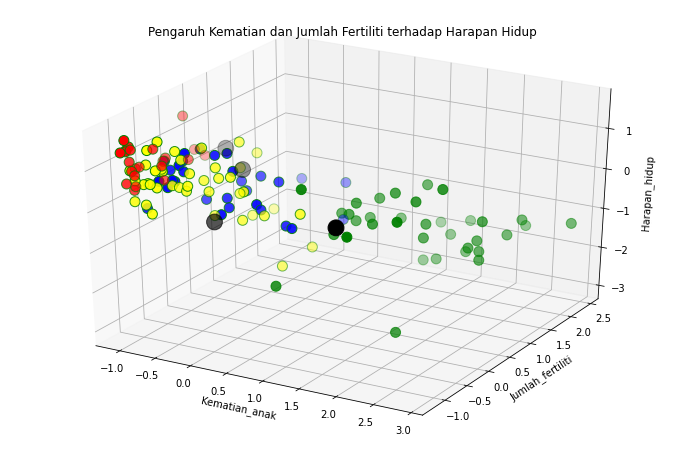

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(new_df5['Kematian_anak'][new_df5.label5_kmeans==0], new_df5['Jumlah_fertiliti'][new_df5.label5_kmeans==0], new_df5['Harapan_hidup'][new_df5.label5_kmeans==0], c='blue', s=100, edgecolors='green')
ax.scatter(new_df5['Kematian_anak'][new_df5.label5_kmeans==1], new_df5['Jumlah_fertiliti'][new_df5.label5_kmeans==1], new_df5['Harapan_hidup'][new_df5.label5_kmeans==1], c='red', s=100, edgecolors='green')
ax.scatter(new_df5['Kematian_anak'][new_df5.label5_kmeans==2], new_df5['Jumlah_fertiliti'][new_df5.label5_kmeans==2], new_df5['Harapan_hidup'][new_df5.label5_kmeans==2], c='green', s=100, edgecolors='green')
ax.scatter(new_df5['Kematian_anak'][new_df5.label5_kmeans==3], new_df5['Jumlah_fertiliti'][new_df5.label5_kmeans==3], new_df5['Harapan_hidup'][new_df5.label5_kmeans==3], c='yellow', s=100, edgecolors='green')

# plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
scatter = ax.scatter(kmeans5.cluster_centers_[:, 0],
            kmeans5.cluster_centers_[:, 1],
            kmeans5.cluster_centers_[:, 2],
            s = 250,
            marker='o',
            c='k',
            label='centroids')
plt.title('Pengaruh Kematian dan Jumlah Fertiliti terhadap Harapan Hidup')
plt.xlabel('Kematian_anak')
plt.ylabel('Jumlah_fertiliti')
ax.set_zlabel('Harapan_hidup')
plt.show()

### Plot 3D - Kematian_anak, Jumlah Fertiliti, dan Inflasi

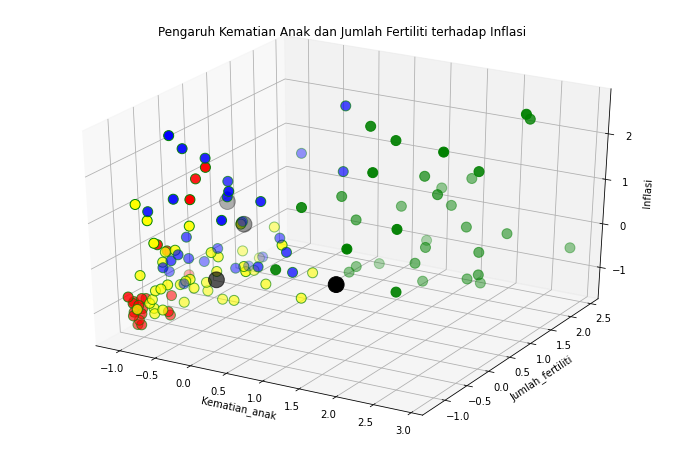

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(new_df5['Kematian_anak'][new_df5.label5_kmeans==0], new_df5['Jumlah_fertiliti'][new_df5.label5_kmeans==0], new_df5['Inflasi'][new_df5.label5_kmeans==0], c='blue', s=100, edgecolors='green')
ax.scatter(new_df5['Kematian_anak'][new_df5.label5_kmeans==1], new_df5['Jumlah_fertiliti'][new_df5.label5_kmeans==1], new_df5['Inflasi'][new_df5.label5_kmeans==1], c='red', s=100, edgecolors='green')
ax.scatter(new_df5['Kematian_anak'][new_df5.label5_kmeans==2], new_df5['Jumlah_fertiliti'][new_df5.label5_kmeans==2], new_df5['Inflasi'][new_df5.label5_kmeans==2], c='green', s=100, edgecolors='green')
ax.scatter(new_df5['Kematian_anak'][new_df5.label5_kmeans==3], new_df5['Jumlah_fertiliti'][new_df5.label5_kmeans==3], new_df5['Inflasi'][new_df5.label5_kmeans==3], c='yellow', s=100, edgecolors='green')

# plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
scatter = ax.scatter(kmeans5.cluster_centers_[:, 0],
            kmeans5.cluster_centers_[:, 1],
            kmeans5.cluster_centers_[:, 2],
            s = 250,
            marker='o',
            c='k',
            label='centroids')
plt.title('Pengaruh Kematian Anak dan Jumlah Fertiliti terhadap Inflasi')
plt.xlabel('Kematian_anak')
plt.ylabel('Jumlah_fertiliti')
ax.set_zlabel('Inflasi')
plt.show()

### Plot 3D - GDPperkapita, Pendapatan, dan Ekspor

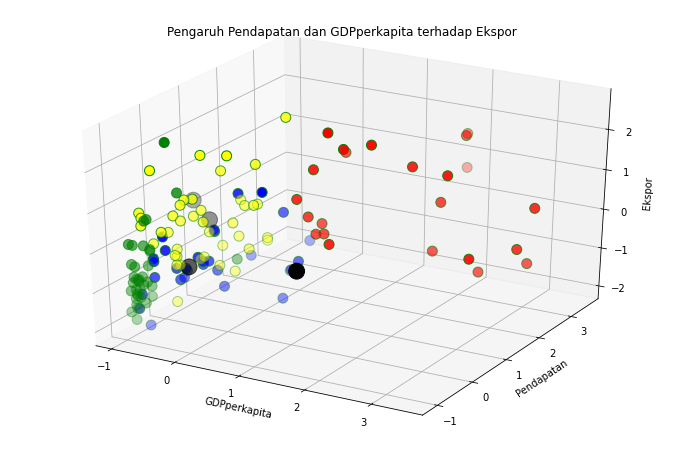

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(new_df5['GDPperkapita'][new_df5.label5_kmeans==0], new_df5['Pendapatan'][new_df5.label5_kmeans==0], new_df5['Ekspor'][new_df5.label5_kmeans==0], c='blue', s=100, edgecolors='green')
ax.scatter(new_df5['GDPperkapita'][new_df5.label5_kmeans==1], new_df5['Pendapatan'][new_df5.label5_kmeans==1], new_df5['Ekspor'][new_df5.label5_kmeans==1], c='red', s=100, edgecolors='green')
ax.scatter(new_df5['GDPperkapita'][new_df5.label5_kmeans==2], new_df5['Pendapatan'][new_df5.label5_kmeans==2], new_df5['Ekspor'][new_df5.label5_kmeans==2], c='green', s=100, edgecolors='green')
ax.scatter(new_df5['GDPperkapita'][new_df5.label5_kmeans==3], new_df5['Pendapatan'][new_df5.label5_kmeans==3], new_df5['Ekspor'][new_df5.label5_kmeans==3], c='yellow', s=100, edgecolors='green')

# plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
scatter = ax.scatter(kmeans5.cluster_centers_[:, 0],
            kmeans5.cluster_centers_[:, 1],
            kmeans5.cluster_centers_[:, 2],
            s = 250,
            marker='o',
            c='k',
            label='centroids')
plt.title('Pengaruh Pendapatan dan GDPperkapita terhadap Ekspor')
plt.xlabel('GDPperkapita')
plt.ylabel('Pendapatan')
ax.set_zlabel('Ekspor')
plt.show()

### Plot 3D - GDPperkapita, Pendapatan, dan Kesehatan

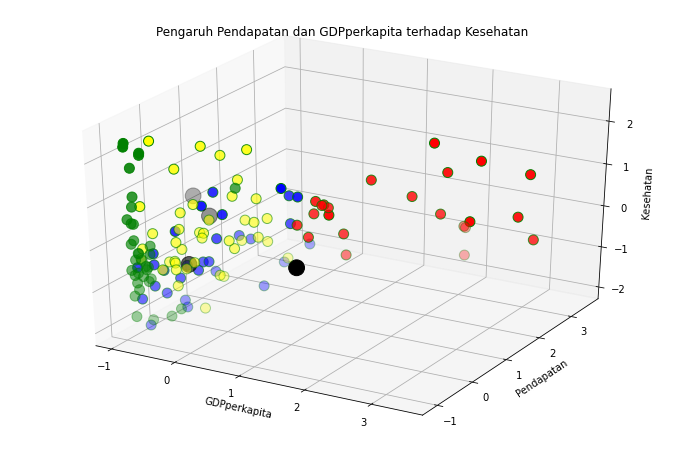

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(new_df5['GDPperkapita'][new_df5.label5_kmeans==0], new_df5['Pendapatan'][new_df5.label5_kmeans==0], new_df5['Kesehatan'][new_df5.label5_kmeans==0], c='blue', s=100, edgecolors='green')
ax.scatter(new_df5['GDPperkapita'][new_df5.label5_kmeans==1], new_df5['Pendapatan'][new_df5.label5_kmeans==1], new_df5['Kesehatan'][new_df5.label5_kmeans==1], c='red', s=100, edgecolors='green')
ax.scatter(new_df5['GDPperkapita'][new_df5.label5_kmeans==2], new_df5['Pendapatan'][new_df5.label5_kmeans==2], new_df5['Kesehatan'][new_df5.label5_kmeans==2], c='green', s=100, edgecolors='green')
ax.scatter(new_df5['GDPperkapita'][new_df5.label5_kmeans==3], new_df5['Pendapatan'][new_df5.label5_kmeans==3], new_df5['Kesehatan'][new_df5.label5_kmeans==3], c='yellow', s=100, edgecolors='green')

# plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
scatter = ax.scatter(kmeans5.cluster_centers_[:, 0],
            kmeans5.cluster_centers_[:, 1],
            kmeans5.cluster_centers_[:, 2],
            s = 250,
            marker='o',
            c='k',
            label='centroids')
plt.title('Pengaruh Pendapatan dan GDPperkapita terhadap Kesehatan')
plt.xlabel('GDPperkapita')
plt.ylabel('Pendapatan')
ax.set_zlabel('Kesehatan')
plt.show()

### Plot 3D - Jumlah Fertiliti, Kesehatan, dan Pendapatan

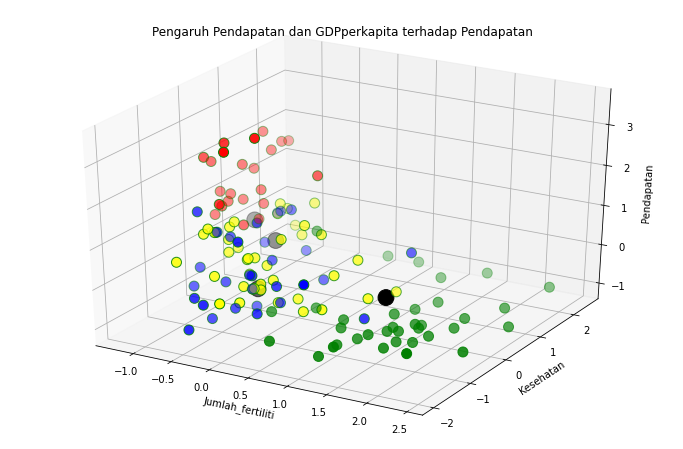

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(new_df5['Jumlah_fertiliti'][new_df5.label5_kmeans==0], new_df5['Kesehatan'][new_df5.label5_kmeans==0], new_df5['Pendapatan'][new_df5.label5_kmeans==0], c='blue', s=100, edgecolors='green')
ax.scatter(new_df5['Jumlah_fertiliti'][new_df5.label5_kmeans==1], new_df5['Kesehatan'][new_df5.label5_kmeans==1], new_df5['Pendapatan'][new_df5.label5_kmeans==1], c='red', s=100, edgecolors='green')
ax.scatter(new_df5['Jumlah_fertiliti'][new_df5.label5_kmeans==2], new_df5['Kesehatan'][new_df5.label5_kmeans==2], new_df5['Pendapatan'][new_df5.label5_kmeans==2], c='green', s=100, edgecolors='green')
ax.scatter(new_df5['Jumlah_fertiliti'][new_df5.label5_kmeans==3], new_df5['Kesehatan'][new_df5.label5_kmeans==3], new_df5['Pendapatan'][new_df5.label5_kmeans==3], c='yellow', s=100, edgecolors='green')

# plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
scatter = ax.scatter(kmeans5.cluster_centers_[:, 0],
            kmeans5.cluster_centers_[:, 1],
            kmeans5.cluster_centers_[:, 2],
            s = 250,
            marker='o',
            c='k',
            label='centroids')
plt.title('Pengaruh Pendapatan dan GDPperkapita terhadap Pendapatan')
plt.xlabel('Jumlah_fertiliti')
plt.ylabel('Kesehatan')
ax.set_zlabel('Pendapatan')
plt.show()